In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
reviews = []
for i in range(1,201):
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    review = soup.find_all('div', class_='body')
    for rv in review:
        review_text= rv.find('div', class_='text_content').text
        recommendation = rv.find_all('td', class_='review-value')[-1].text
        reviews.append([review_text, recommendation])

In [4]:
dataset= pd.DataFrame(reviews, columns=['Review_Text','Recommendation'])
dataset.to_csv('british_reviews.csv')

In [7]:
df = pd.read_csv('british_reviews.csv')
df.head()

,Unnamed: 0,Review_Text,Recommendation
0,0,"Not Verified | On March 1st, I flew from Ber...",no
1,1,Not Verified | The WORST customer experience! ...,no
2,2,Not Verified | Had to cancel my flight month...,no
3,3,✅ Trip Verified | Flight cancelled with no rea...,no
4,4,✅ Trip Verified | This is a route I fly regula...,yes


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_Text     2000 non-null   object
 1   Recommendation  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [11]:
df.duplicated().sum()

0

In [105]:
import re
import regex as rg
from wordcloud import WordCloud
from textblob import TextBlob
from nrclex import NRCLex
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from collections import Counter
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_review(review):
    txt0 = re.sub('Not Verified','',review)
    txt1 = re.sub('Trip Verified','',txt0)
    txt2 = re.sub('Unverified','',txt1)
    txt = re.sub('Verified Review','',txt2)
    
    clean =  rg.sub(r'[^\p{L}\p{N}\s]','',txt)
    clean_txt = clean.lower()
    # Remove URLs, mentions, and hashtags
    clean_txt = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', clean_txt, flags=re.MULTILINE)
    
    # Remove punctuation
    clean_txt = clean_txt.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    clean_txt = re.sub(r'\d+', '', clean_txt)
    
    # Remove special characters
    clean_txt = re.sub(r'[^A-Za-z\s]', '', clean_txt)
    
    # Tokenize text
    tokens = clean_txt.split()
    
    # Remove stop words and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    cleaned_txt = ' '.join(tokens)
    
    return clean_txt
    
    

In [74]:
def sentiment(sent):
    analysis = TextBlob(str(sent))
    return analysis.sentiment.polarity

In [75]:
def emotions(text):
    emotion = NRCLex(text)
    # Get emotion scores
    emotion_scores = emotion.raw_emotion_scores
    
    if emotion_scores:
        # Find the most dominant emotion
        dominant_emotion = max(emotion_scores, key=emotion_scores.get)
        return dominant_emotion
    else:
        return None
    

In [76]:
df['clean_review'] = df['Review_Text'].apply(lambda x : clean_review(x))

In [77]:
df['Sentiment'] = df['clean_review'].apply(sentiment)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0  else 'Negative' )

In [78]:
df['Emotion'] = df['clean_review'].apply(lambda x: emotions(x))

<Axes: ylabel='Recommendation'>

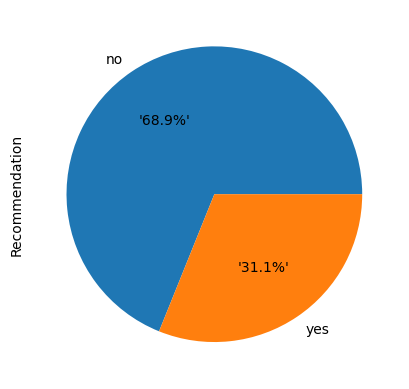

In [80]:
df["Recommendation"].value_counts().plot.pie(autopct="'%1.1f%%'")

In [92]:
stop= ['british','airways', 'ba', "heathrow","British Airways","airline","service","would","trip","verified","flight","london","seat","passenger","plane","cabin","trip verified","ba","british airway","hour","drink",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

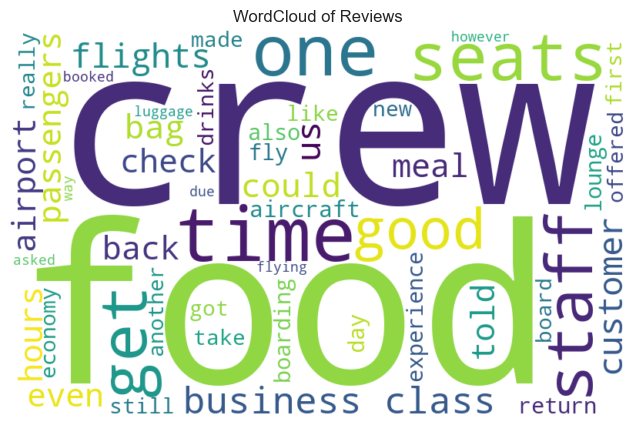

In [144]:
import matplotlib.pyplot as plt
stop= ['british','airways', 'ba', "heathrow","British Airways","airline","service","would",
       "trip","verified","flight","london","seat","passenger","plane","cabin","trip verified",
       "ba","british airway","hour","drink",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
       'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
       "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
       'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
       'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
       'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
       'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 
       'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
       'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 
       'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
       'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
       'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
       "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
       'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
       'wasn', "wasn't", 
       'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
cloud = WordCloud(width=800, height=500, stopwords=stop, 
                  background_color='white', max_words=50).generate("".join(df['clean_review']))
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Reviews' )
plt.savefig('cloud.png')
plt.show()

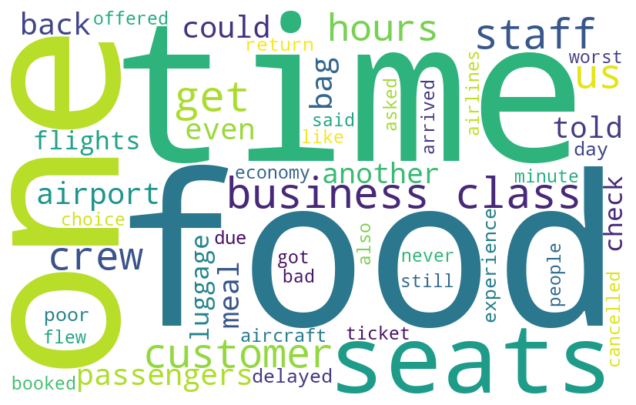

In [99]:
import matplotlib.pyplot as plt
negative = df['clean_review'][df['Sentiment']=='Negative']
cloud = WordCloud(width=800, height=500, stopwords=stop, background_color='white', max_words=50).generate("".join(negative))
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [119]:
#Let's create the positive reviews and negative reviews variables by joining the sentiment and the rating attribute
positive_reviews = ''.join(df[df["Sentiment"]=='Positive']['clean_review'])
negative_reviews = ''.join(df[df["Sentiment"]=='Negative']['clean_review'])

In [126]:
#Tokenitization
stopwords_set = set(stopwords.words('english') + ['british','airways', 'ba', "heathrow","British Airways","airline","service","would","trip","verified","flight","london","seat","passenger","plane","cabin","trip verified","ba","british airway","hour","drink",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])
positive_tokens = [word.lower() for word in word_tokenize(positive_reviews) if word.isalpha() and word.lower() not in stopwords_set ]
negative_tokens = [word.lower() for word in word_tokenize(negative_reviews) if word.isalpha() and word.lower() not in stopwords_set ]

In [146]:
#5 most common words
top_positive_keywords = Counter(positive_tokens).most_common(5)
top_negative_keywords = Counter(negative_tokens).most_common(5)
print(f'Top 5 positive Keywords {top_positive_keywords}')
print(f'Top 5 negative Keywords {top_negative_keywords}')

Top 5 positive Keywords [('crew', 850), ('good', 836), ('food', 811), ('time', 795), ('class', 652)]
Top 5 negative Keywords [('class', 359), ('food', 335), ('business', 327), ('seats', 312), ('one', 312)]


In [152]:
df['Sentiment'].value_counts(normalize=True)

Positive    0.646
Negative    0.347
Neutral     0.007
Name: Sentiment, dtype: float64

In [128]:
import seaborn as sns

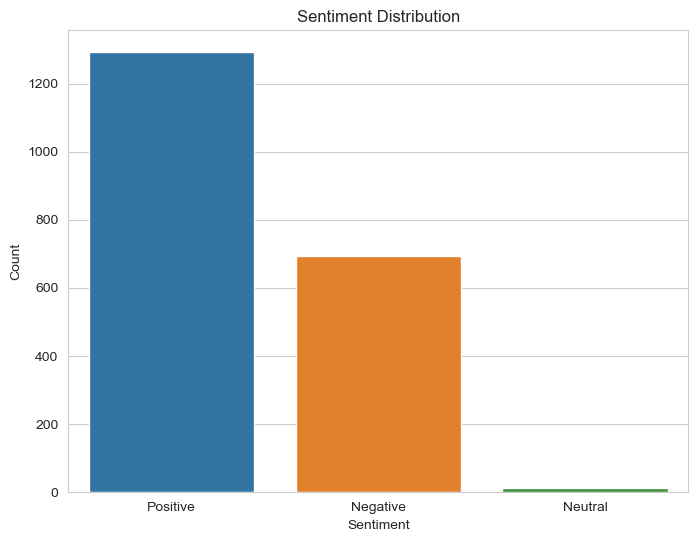

In [142]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.savefig('sent.png')
plt.show()

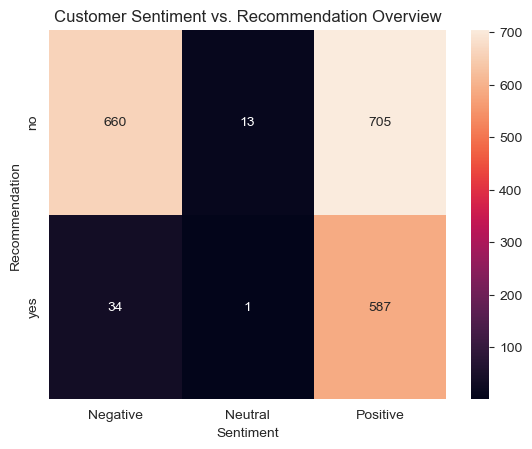

In [151]:
sns.heatmap(pd.crosstab(df.Recommendation, df["Sentiment"]), annot=True, fmt="d")
plt.title('Customer Sentiment vs. Recommendation Overview')
plt.savefig('ctab.png')
plt.show()

In [149]:
df.groupby('Recommendation')['Sentiment'].value_counts(normalize=True)

Recommendation  Sentiment
no              Positive     0.511611
                Negative     0.478955
                Neutral      0.009434
yes             Positive     0.943730
                Negative     0.054662
                Neutral      0.001608
Name: Sentiment, dtype: float64